In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Corrected import as per common usage
import os
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [2]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, zoom_range=0.5, shear_range=0.3, horizontal_flip=True)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


In [3]:
train = train_datagen.flow_from_directory(directory='New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train', target_size=(256,256), batch_size=32, class_mode='categorical')

val = val_datagen.flow_from_directory(directory='New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid', target_size=(256,256), batch_size=32, class_mode='categorical')

Found 69814 images belonging to 38 classes.
Found 17462 images belonging to 38 classes.


In [4]:
t_img, label = next(train)

In [5]:
def plotImage(img_arr, label):
  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.show()

In [6]:
plotImage(t_img[:5], label[:5])

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [7]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [8]:
base_model = VGG19(input_shape=(256,256,3), include_top=False)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 253s 3us/step


In [9]:
for layer in base_model.layers:
  layer.trainable = False


In [10]:
x = Flatten()(base_model.output)

x = Dense(units=38, activation='softmax')(x)

model = Model(base_model.input, x)

In [11]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

Early stopping and Model check point

In [12]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es  = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1)
mc = ModelCheckpoint(filepath="best_model.h5", monitor='val_accuracy',  verbose=1, save_best_only=True)

cb = [es, mc]

In [14]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy']) # Re-compile the model
his = model.fit(train, steps_per_epoch=16, epochs=50, verbose=1, callbacks=cb, validation_data=val, validation_steps=16)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.4170 - loss: 15.5494
Epoch 1: val_accuracy improved from 0.37695 to 0.46094, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 317s 20s/step - accuracy: 0.4160 - loss: 15.5833 - val_accuracy: 0.4609 - val_loss: 18.0458
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.4709 - loss: 14.9910
Epoch 2: val_accuracy improved from 0.46094 to 0.67773, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 307s 20s/step - accuracy: 0.5332 - loss: 13.3025 - val_accuracy: 0.6777 - val_loss: 6.7940
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5774 - loss: 12.1735
Epoch 3: val_accuracy improved from 0.67773 to 0.70703, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 310s 20s/step - accuracy: 0.5723 - loss: 11.8657 - val_accuracy: 0.7070 - val_loss: 6.9340
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5928 - loss: 10.1817
Epoch 4: val_accuracy improved from 0.70703 to 0.72070, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 313s 20s/step - accuracy: 0.6191 - loss: 10.1750 - val_accuracy: 0.7207 - val_loss: 7.0447
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.6161 - loss: 11.2112 
Epoch 5: val_accuracy improved from 0.72070 to 0.75391, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 320s 21s/step - accuracy: 0.6465 - loss: 10.1041 - val_accuracy: 0.7539 - val_loss: 7.3462
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.6804 - loss: 9.0785
Epoch 6: val_accuracy did not improve from 0.75391
16/16 ━━━━━━━━━━━━━━━━━━━━ 311s 20s/step - accuracy: 0.6582 - loss: 9.4885 - val_accuracy: 0.7227 - val_loss: 7.7399
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.6858 - loss: 8.5528
Epoch 7: val_accuracy improved from 0.75391 to 0.76758, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 317s 20s/step - accuracy: 0.6895 - loss: 8.2074 - val_accuracy: 0.7676 - val_loss: 7.0006
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.7012 - loss: 8.2431
Epoch 8: val_accuracy improved from 0.76758 to 0.78711, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 308s 20s/step - accuracy: 0.7051 - loss: 8.5075 - val_accuracy: 0.7871 - val_loss: 7.3112
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.7046 - loss: 7.5969
Epoch 9: val_accuracy did not improve from 0.78711
16/16 ━━━━━━━━━━━━━━━━━━━━ 318s 21s/step - accuracy: 0.7148 - loss: 7.4816 - val_accuracy: 0.7676 - val_loss: 6.2366
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.7117 - loss: 7.0444
Epoch 10: val_accuracy did not improve from 0.78711
16/16 ━━━━━━━━━━━━━━━━━━━━ 304s 20s/step - accuracy: 0.6992 - loss: 8.3861 - val_accuracy: 0.7734 - val_loss: 7.7000
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.7250 - loss: 8.6633
Epoch 11: val_accuracy did not improve from 0.78711
16/16 ━━━━━━━━━━━━━━━━━━━━ 304s 20s/step - accuracy: 0.7129 - loss: 9.8623 - val_accuracy: 0.7578 - val_loss: 8.3135
Epoch 11: early stopping


In [15]:
h = his.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

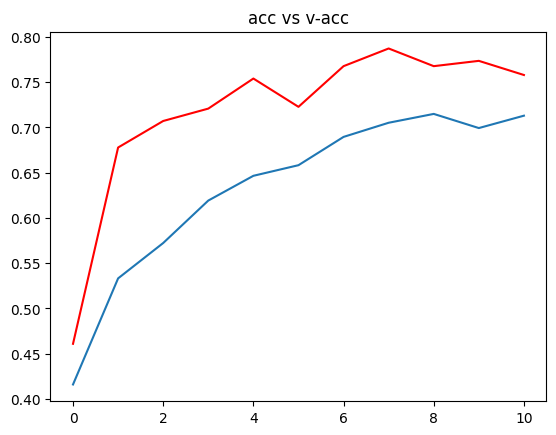

In [16]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

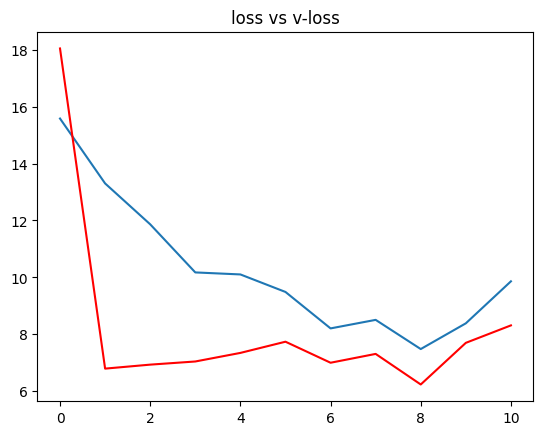

In [17]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()

In [18]:
#load best model
from keras.models import load_model
model = load_model("best_model.h5")

In [ ]:
# Evaluate the model
acc = model.evaluate(val)[1]
print(f"The accuracy of the model is = {acc*100} %")

In [ ]:
def prediction(path):
  img = load_img(path, target_size=(256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis=0)
  class_indices = train.class_indices
  ref = dict((v, k) for k, v in class_indices.items())
  pred = np.argmax(model.predict(img))
  print(f"The image belongs to {ref[pred]}")

In [ ]:
path = 'test/test/AppleCedarRust1.JPG'
prediction(path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
The image belongs to Apple___Cedar_apple_rust
